In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(
    'avocado.csv'
)

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df = df.drop('Unnamed: 0', axis = 1)

In [5]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [6]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [7]:
X = df.iloc[:, 2:]
y = df.iloc[:, 1]

In [8]:
#from sklearn.preprocessing import StandardScaler
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
#X.iloc[:, [0,1,2,3,4,5,6,7,9, ]] = StandardScaler().fit_transform(X.iloc[:, [0,1,2,3,4,5,6,7,9]])

In [9]:
X.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [10]:
X = X.drop('Total Bags', axis = 1)

In [11]:
X.head()

,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [12]:
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [13]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

In [14]:
# Encoding categorical data
X=pd.get_dummies(X.drop(['region'],axis=1),drop_first=True)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X.head()

,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,2015,12,27,0
1,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,2015,12,20,0
2,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,2015,12,13,0
3,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,2015,12,6,0
4,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,2015,11,29,0


In [17]:
# This is the model we'll be using.

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Initialize and train our tree.
decision_tree = DecisionTreeRegressor(
    criterion='mse',
    max_features=1,
    max_depth=5
)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=1,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
rfc = ensemble.RandomForestRegressor()
rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Text(0,0.5,'Predicted Y')

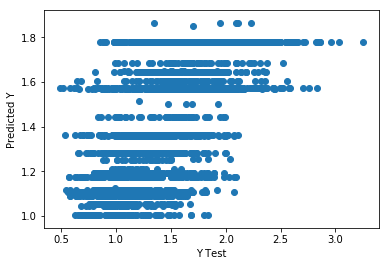

In [20]:
pred=decision_tree.predict(X_test)
plt.scatter(x=y_test, y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Text(0,0.5,'Predicted Y')

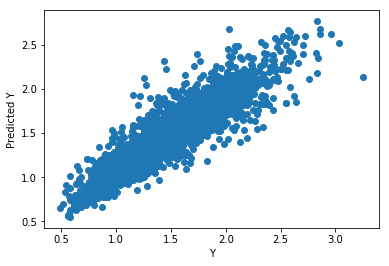

In [21]:
pred=rfc.predict(X_test)
plt.scatter(x=y_test, y=pred)
plt.xlabel('Y')
plt.ylabel('Predicted Y')

# Timing

In [22]:
# Random Forest

import time
rf_start_time = time.time()
rfc = ensemble.RandomForestRegressor(max_depth=10)
display(cross_val_score(rfc, X_test, y_test, cv=10))
print ("Random Forest runtime: {}".format(time.time() - rf_start_time))

array([0.74046411, 0.73610933, 0.74588573, 0.7636665 , 0.72807438,
       0.73458885, 0.74284786, 0.71567884, 0.71721907, 0.74420042])

Random Forest runtime: 1.5894017219543457


In [23]:
#Decision Tree

dt_start_time = time.time()
# Initialize and train our tree.
dt = DecisionTreeRegressor(
    criterion='mse',
    max_features=1,
    max_depth=5
)
dt.fit(X, y)
display(cross_val_score(dt, X_test, y_test, cv=10))
print ("Decision Tree runtime: {}".format(time.time() - rf_start_time))

array([0.32579277, 0.43038689, 0.42078495, 0.35489977, 0.34978938,
       0.34916775, 0.38972854, 0.49476401, 0.38128007, 0.47420839])

Decision Tree runtime: 1.6749539375305176
